In [56]:
import pandas as pd
import sqlite3

## Подключение к БД

In [57]:
data = sqlite3.connect("../data/checking-logs.sqlite")

## Получить даты `datetime` из таблицы `pageviews` только для пользователей `user_*`, без админов

In [58]:
sql_request = """
Select uid, datetime FROM pageviews WHERE uid LIKE 'user_%'
"""

dataframe = pd.read_sql(sql_request, data)

In [59]:
dataframe

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
...,...,...
982,user_28,2020-05-21 18:45:20.441142
983,user_19,2020-05-21 23:03:06.457819
984,user_25,2020-05-21 23:23:49.995349
985,user_5,2020-05-22 11:30:18.368990


## Преобразуем столбец `datetime` в `datetime64[ns]`

In [60]:
dataframe['datetime'] = pd.to_datetime(dataframe['datetime'])

## В *Pandas* сгруппировать посещения по дате

---

- Групирует по столбцу `datetime` из *dataframe*. И при групировке берет только Дату с строки. При групировке суммирует

    - И все это присваивают к `dataframe_view`

- Переименовываем столбец `datetime` в `view`

- К столбцу с индексами даем назвение `date`

In [61]:
dataframe_view = dataframe.groupby(dataframe["datetime"].dt.date).count()

dataframe_view = dataframe_view["datetime"].rename("view")

dataframe_view.index.name = 'date'

dataframe_view

date
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2
Name: view, dtype: int64

## Cоздать граф с помощью `plot()`

---

- `plot()` - функция *pandas* которая может частично выполнять действия *Matplotlibe*

    - `x="date"` - на ось `Х` дают данные с столбца `date`

    - `y="view"` - на ось `Y` дают данные с столбца `view`

    - `kind="line"` - Тип гравика. *Линейный*

    - `title="View per day"` - Заголовок графика

    - `figsize=(15,8)` - Фиксированный размер графика

    - `fontsize=8` - Размер шрифта

    - `rot=90` - Под каким углом будут записи

<Axes: title={'center': 'View per day'}, xlabel='date'>

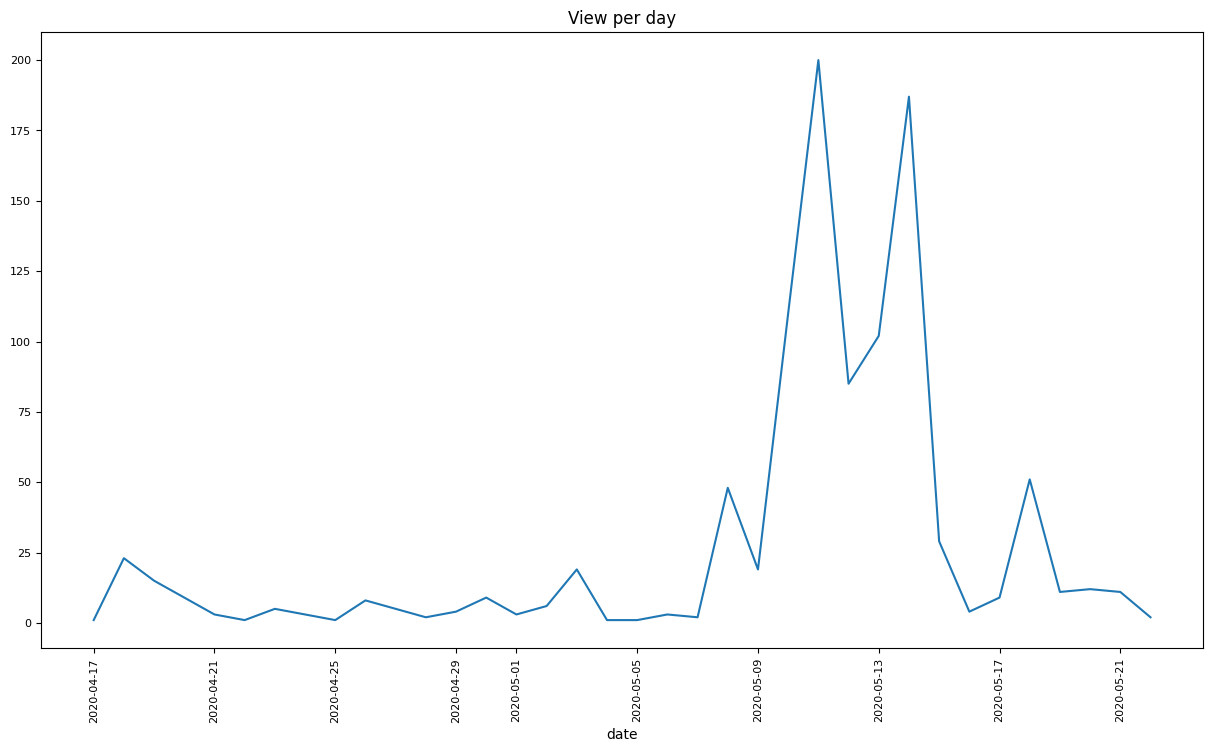

In [70]:
dataframe_view.plot(x="date", y="view", kind="line", title="View per day", figsize=(15,8), fontsize=8, rot=90)

In [66]:
data.close()